In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import model_selection
import xgboost as xgb

from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')

In [3]:
pdp.ProfileReport(train_df)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [4]:
print(train_df.info())
print('-' * 50)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket      

In [5]:
print(train_df.isnull().sum())
print('-' * 50)
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
data = pd.concat([train_df, test_df])
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [9]:
null_age = data[~data['Age'].notnull()]

In [10]:
null_age

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631
28,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959
29,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,30,3,male,0,0.0,349216
31,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,1,1.0,PC 17569
32,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,33,3,female,0,1.0,335677
36,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,37,3,male,0,1.0,2677
42,NaN,NaN,C,7.8958,"Kraeff, Mr. Theodor",0,43,3,male,0,0.0,349253


In [11]:
data.loc[5]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
5,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,NaN,7538


In [12]:
data.loc[17]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
17,NaN,NaN,S,13.000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373
17,21.0,NaN,C,7.225,"Assaf, Mr. Gerios",0,909,3,male,0,NaN,2692


In [13]:
data['Title'] = data['Name'].str.extract('([a-zA-Z]+)\.', expand=False)

In [14]:
pd.crosstab(data['Title'], data['Pclass'])

Pclass,1,2,3
Title,,,
Capt,1,0,0
Col,4,0,0
Countess,1,0,0
Don,1,0,0
Dona,1,0,0
Dr,6,2,0
Jonkheer,1,0,0
Lady,1,0,0
Major,2,0,0


In [15]:
age_ref = data.groupby('Title').Age.mean()

In [16]:
age_ref

Title
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

In [17]:
# data['Title]の平均値でAgeの欠損を補完
data = data.assign(Age = data.apply(lambda r: r.Age if pd.notnull(r.Age) else age_ref[r.Title], axis=1))

In [18]:
del age_ref

In [19]:
data.loc[5]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
5,32.252151,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr
5,14.000000,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,NaN,7538,Mr


In [20]:
data.loc[19]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
19,36.994118,NaN,C,7.225,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649,Mrs
19,45.000000,NaN,C,7.225,"Assaf Khalil, Mrs. Mariana (Miriam"")""",0,911,3,female,0,NaN,2696,Mrs


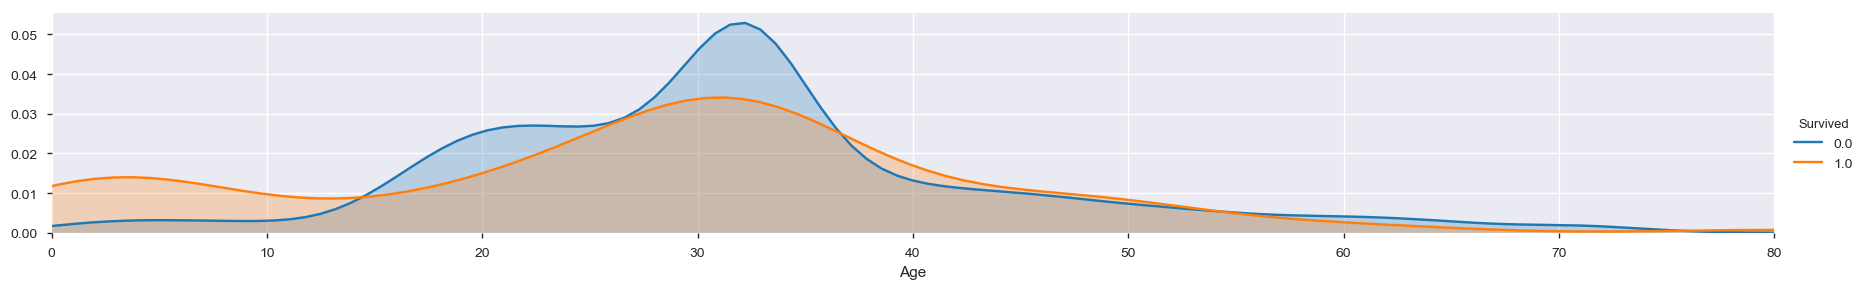

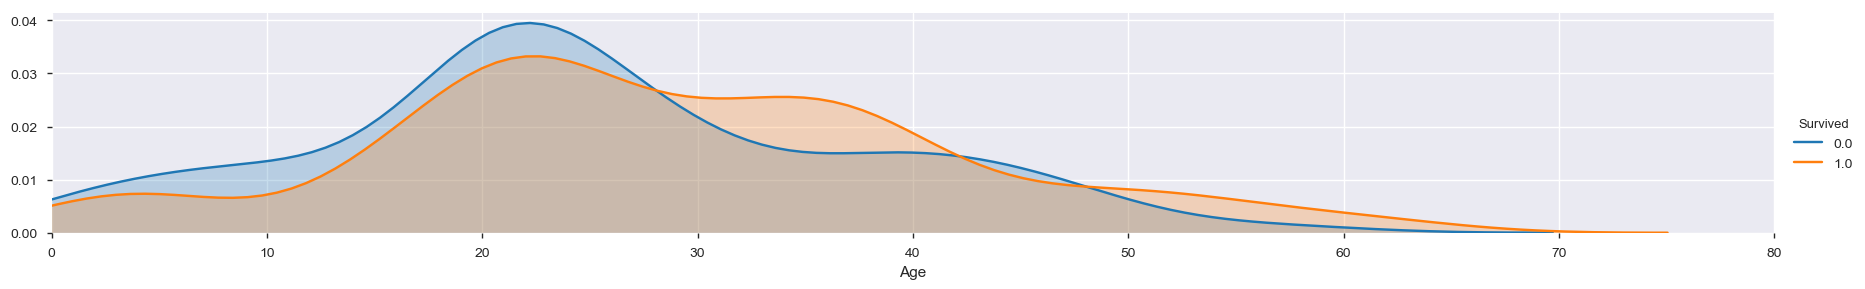

In [21]:
a = sns.FacetGrid(data[data.Sex == 'male'], hue='Survived', aspect=6)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, data['Age'].max()))
a.add_legend()

a = sns.FacetGrid(data[data.Sex == 'female'], hue='Survived', aspect=6)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, data['Age'].max()))
a.add_legend()

In [22]:
data['AgeBand'] = pd.cut(data['Age'], 5, labels=range(5)).astype(int)
data[['AgeBand', 'Survived']].groupby(['AgeBand']).agg(['count', 'mean'])

Survived          
           count      mean
AgeBand                   
0            104  0.548077
1            382  0.392670
2            325  0.320000
3             69  0.434783
4             11  0.090909

In [23]:
data['Title'] = data['Title'].replace(['Don', 'Capt', 'Col', 'Major', 'Sir', 'Jonkheer', 'Rev', 'Dr'], 'Honored')
data['Title'] = data['Title'].replace(['Lady', 'Dona', 'Mme', 'Countess'], 'Mrs')
data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
data[['Title', 'Survived']].groupby(['Title']).agg(['count','mean'])

Survived          
           count      mean
Title                     
Honored       21  0.285714
Master        40  0.575000
Miss         185  0.702703
Mr           517  0.156673
Mrs          128  0.796875

In [24]:
# Fareの特徴量エンジニアリング
data['Fare'] = data['Fare'].fillna(32.204)

In [25]:
data.isnull().sum()

Age               0
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
AgeBand           0
dtype: int64

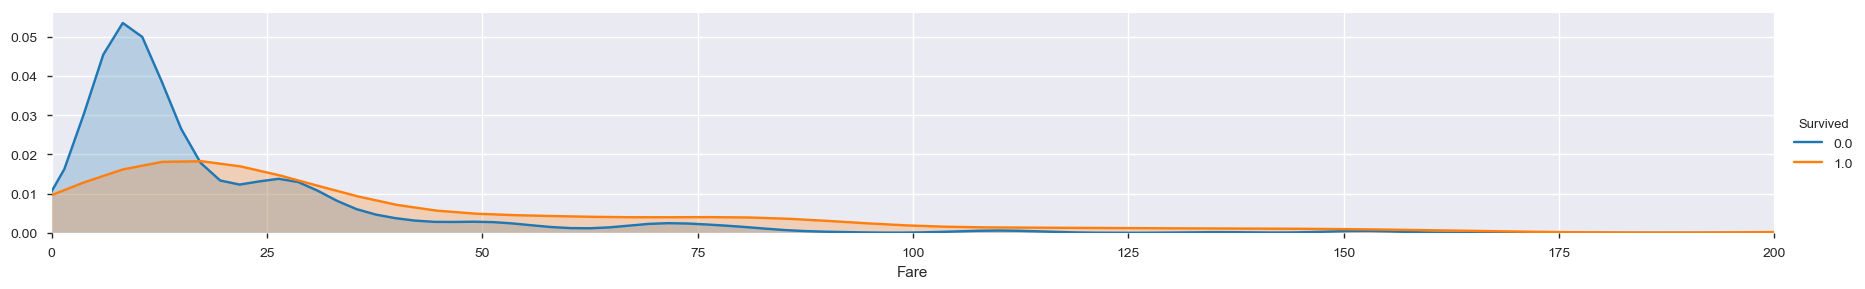

In [26]:
a = sns.FacetGrid(data, hue='Survived', aspect=6)
a.map(sns.kdeplot, 'Fare', shade=True)
# a.set(xlim=(0, data['Fare'].max()))
a.set(xlim=(0, 200))
a.add_legend()

In [27]:
def fare_to_num(fare):
    if (fare > 0) & (fare <= 7.5):
        return 1
    elif (fare > 7.5) & (fare <= 12.5):
        return 2
    elif (fare > 12.5) & (fare <= 17):
        return 3
    elif (fare > 17) & (fare <= 29):
        return 4
    elif (fare > 29):
        return 5
    else:
        return 0
    
data['FareBand'] = data['Fare'].apply(fare_to_num)

In [28]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeBand,FareBand
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,5
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,2
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,5
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,2,2


In [29]:
data[['FareBand', 'Survived']].groupby(['FareBand']).agg(['count', 'mean'])

Survived          
            count      mean
FareBand                   
0              15  0.066667
1              72  0.152778
2             296  0.260135
3             113  0.380531
4             147  0.462585
5             248  0.572581

In [30]:
# Embarkの欠損の確認
data['Embarked'].isnull().sum()

2

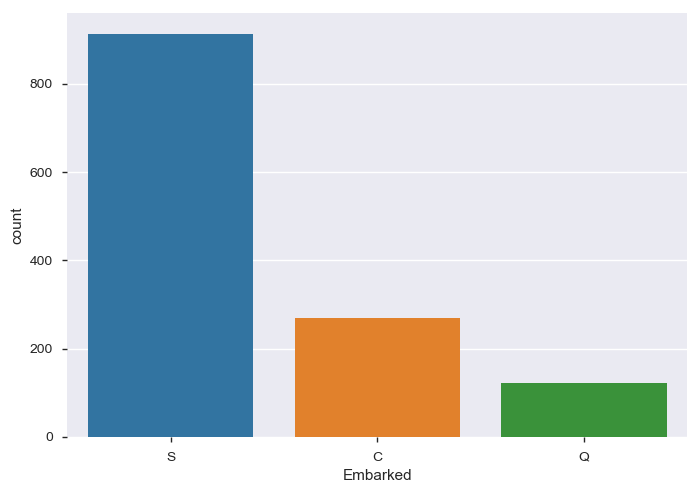

In [31]:
sns.countplot(data['Embarked'])

In [32]:
data['Embarked'] = data['Embarked'].fillna('S')

In [33]:
data.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
AgeBand           0
FareBand          0
dtype: int64

In [34]:
data[['Embarked', 'Survived']].groupby(['Embarked']).agg(['count', 'mean'])

Survived          
            count      mean
Embarked                   
C             168  0.553571
Q              77  0.389610
S             646  0.339009

In [37]:
data['Cabin'].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
F33                4
C22 C26            4
D                  4
C78                4
F2                 4
B96 B98            4
E34                3
E101               3
C101               3
A34                3
B51 B53 B55        3
B58 B60            3
E67                2
E50                2
C65                2
B78                2
B49                2
C85                2
C55 C57            2
C124               2
E24                2
C93                2
D19                2
E46                2
C32                2
E8                 2
                  ..
E40                1
B10                1
A14                1
B36                1
E45                1
B37                1
E68                1
B38                1
A31                1
A32                1
C53                1
D45                1
C49                1
E49                1
A16                1
D7                 1
B52 B54 B56  

In [38]:
data['DeckCode'] = (data['Cabin']\
                                    .str.slice(0, 1)
                                    .map({
                                        'C': 1,
                                        'E': 2,
                                        'G': 3,
                                        'D': 4,
                                        'A': 5,
                                        'B': 6,
                                        'F': 7
                                    })\
                                    .fillna(0)\
                                    .astype(int))

In [39]:
data[['DeckCode', 'Survived']].groupby('DeckCode').agg(['count', 'mean'])

Survived          
            count      mean
DeckCode                   
0             688  0.299419
1              59  0.593220
2              32  0.750000
3               4  0.500000
4              33  0.757576
5              15  0.466667
6              47  0.744681
7              13  0.615385

In [40]:
# Cabin
data['Room'] = (data['Cabin'].str.slice(1, 5).str.extract('([0-9]+)', expand=False).fillna(0).astype(int))

In [41]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeBand,FareBand,DeckCode,Room
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1,1,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,5,1,85
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,2,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,5,1,123
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,2,2,0,0


In [45]:
def room_to_feature(room):
    if (room > 0) & (room <= 20):
        return 1
    elif (room > 20) & (room <= 40):
        return 2
    elif (room > 40) & (room <= 80):
        return 3
    elif (room > 80):
        return 4
    else:
        return 0
    
data['RoomBand'] = data['Room'].apply(room_to_feature)

In [46]:
data[['RoomBand', 'Survived']].groupby('RoomBand').agg(['count', 'mean'])

Survived          
            count      mean
RoomBand                   
0             691  0.301013
1              45  0.755556
2              53  0.660377
3              57  0.649123
4              45  0.622222

In [47]:
data.loc[data.Ticket=='LINE', 'Ticket'] = 'LINE1'

In [48]:
data['odd'] = data['Ticket'].str.slice(-1).astype(int).map(lambda x: x % 2 == 0).astype(int)

In [49]:
data[['odd', 'Survived']].groupby('odd').agg(['count', 'mean'])

Survived          
       count      mean
odd                   
0        472  0.379237
1        419  0.389021

In [50]:
data['FamilySize'] = (data['SibSp'] + data['Parch']).astype(int)

In [52]:
data[['FamilySize', 'Survived']].groupby('FamilySize').agg(['count', 'mean'])

Survived          
              count      mean
FamilySize                   
0               537  0.303538
1               161  0.552795
2               102  0.578431
3                29  0.724138
4                15  0.200000
5                22  0.136364
6                12  0.333333
7                 6  0.000000
10                7  0.000000

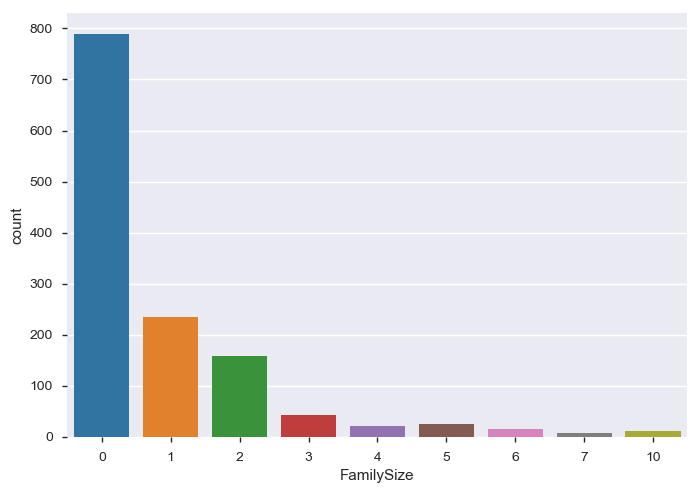

In [53]:
sns.countplot(data['FamilySize'])

In [54]:
data[['Sex', 'Survived']].groupby('Sex').agg(['count', 'mean'])

Survived          
          count      mean
Sex                      
female      314  0.742038
male        577  0.188908

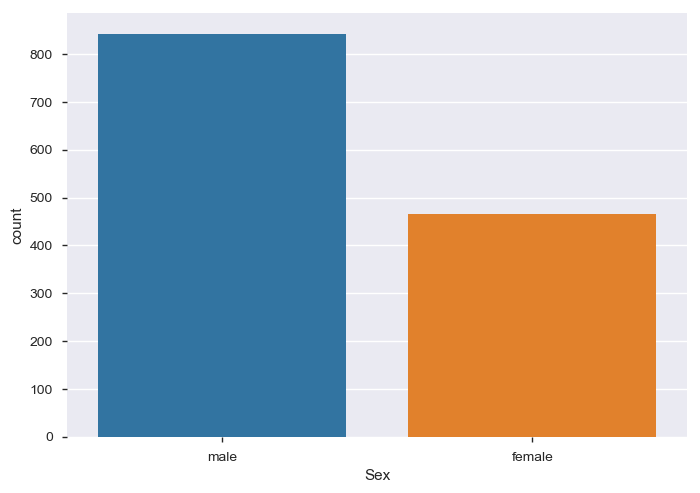

In [55]:
sns.countplot(data['Sex'])

In [61]:
data['FamilySizeBand'] = ''

def family_size_band(num):
    if num == 0:
        return 0
    elif num == 1:
        return 1
    else:
        return 2
    
data['FamilySizeBand'] = data['FamilySize'].apply(family_size_band)

In [62]:
data[['FamilySizeBand', 'Survived']].groupby('FamilySizeBand').agg(['count', 'mean'])

Survived          
                  count      mean
FamilySizeBand                   
0                   537  0.303538
1                   161  0.552795
2                   193  0.466321

In [63]:
data['IsAlone'] = (data['SibSp'] + data['Parch'] == 0).astype(int)
data[['IsAlone', 'Survived']].groupby('IsAlone').agg(['count', 'mean'])

Survived          
           count      mean
IsAlone                   
0            354  0.505650
1            537  0.303538

In [64]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title,AgeBand,FareBand,DeckCode,Room,RoomBand,odd,FamilySize,FamilySizeBand,IsAlone
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,Mr,1,1,0,0,0,0,1,1,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,Mrs,2,5,1,85,4,0,1,1,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,Miss,1,2,0,0,0,1,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,Mrs,2,5,1,123,4,0,1,1,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,...,Mr,2,2,0,0,0,1,0,0,1


In [66]:
# 特徴量を決める
data['SexCode'] = LabelEncoder().fit_transform(data['Sex'])

In [69]:
data['TitleCode'] = LabelEncoder().fit_transform(data['Title'])
data['EmbarkedCode'] = LabelEncoder().fit_transform(data['Embarked'])

In [70]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,DeckCode,Room,RoomBand,odd,FamilySize,FamilySizeBand,IsAlone,SexCode,TitleCode,EmbarkedCode
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,0,0,0,0,1,1,0,1,3,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,1,85,4,0,1,1,0,0,4,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,0,0,0,1,0,0,1,0,2,2
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,1,123,4,0,1,1,0,0,4,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,...,0,0,0,1,0,0,1,1,3,2


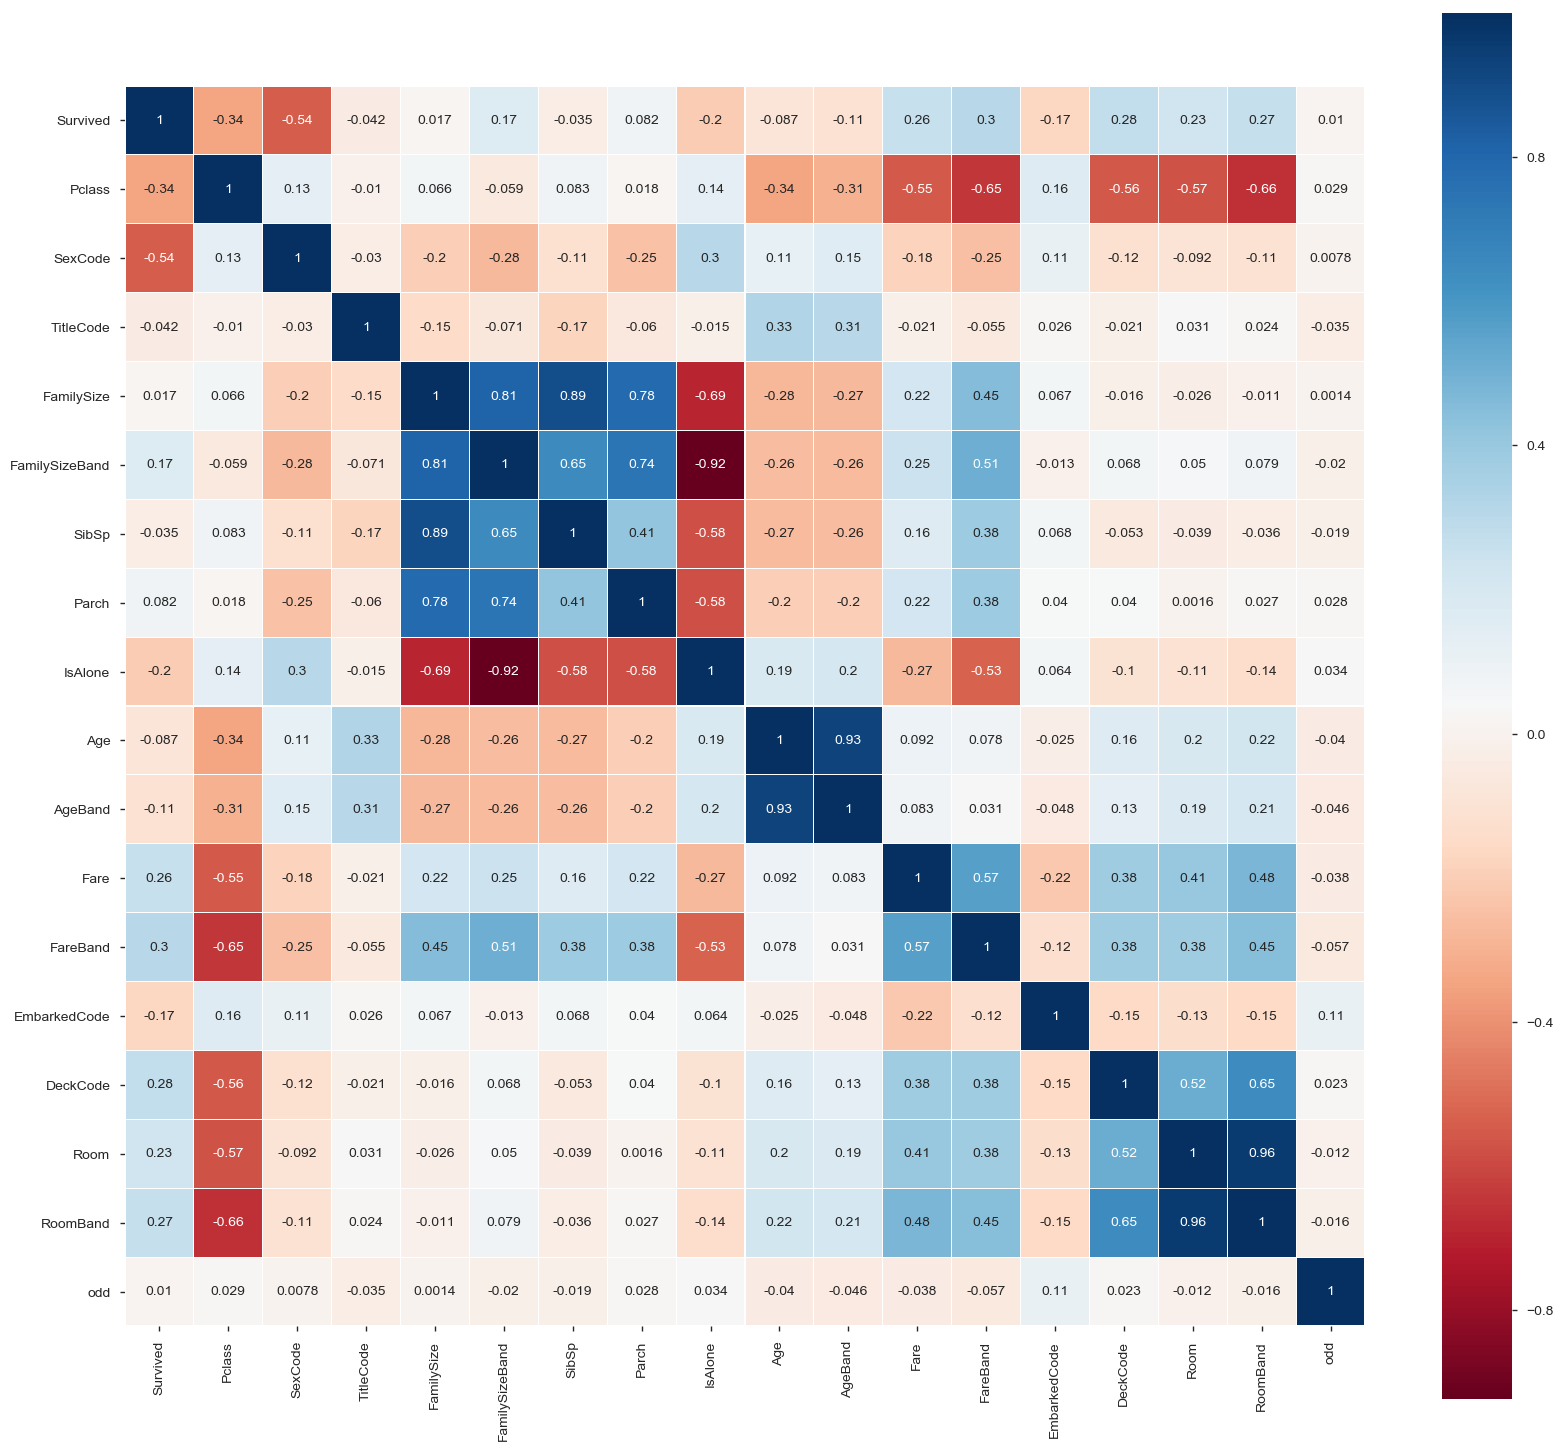

In [75]:
train_size = train_df.shape[0]
features = data[:train_size][[
    'Survived',
    'Pclass',
    'SexCode',
    'TitleCode',
    'FamilySize',
    'FamilySizeBand',
    'SibSp',
    'Parch',
    'IsAlone',
    'Age',
    'AgeBand',
    'Fare',
    'FareBand',    
    'EmbarkedCode',
    'DeckCode',
    'Room',
    'RoomBand',
    'odd'
]]

plt.figure(figsize=(20, 18))
sns.heatmap(features.corr(), linewidth=0.1, vmax=1.0, square=True, cmap=plt.cm.RdBu, annot=True)

In [76]:
cols = [
    'Pclass',
    'Sex',
    'FamilySize',
    #'FamilySizeBand',
    'SibSp',
    'Parch',
    'IsAlone',
    #'Age',
    'AgeBand',
    'Fare',
    #'FareBand',
    'Title',
    #'Embarked',
    'DeckCode',
    #'Room',
    'RoomBand',
    #'Odd',
]

In [77]:
X_train = data[:train_size][cols]
y_train = data[:train_size]['Survived'].astype(int)
X_test = data[train_size:][cols]

In [79]:
print(X_train.shape, y_train.shape, X_test.shape)

(891, 11) (891,) (418, 11)


In [80]:
X_train.head()

,Pclass,Sex,FamilySize,SibSp,Parch,IsAlone,AgeBand,Fare,Title,DeckCode,RoomBand
0,3,male,1,1,0,0,1,7.2500,Mr,0,0
1,1,female,1,1,0,0,2,71.2833,Mrs,1,4
2,3,female,0,0,0,1,1,7.9250,Miss,0,0
3,1,female,1,1,0,0,2,53.1000,Mrs,1,4
4,3,male,0,0,0,1,2,8.0500,Mr,0,0


In [81]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [82]:
one_hot_features = [
    #'Pclass',
    'Sex',    
    #'FamilySizeBand',
    'AgeBand',
    #'FareBand',
    'Title',
    #'Embarked',
    'DeckCode',
    'RoomBand',
    #'Odd'
]

In [83]:
X_train = pd.get_dummies(X_train, columns=one_hot_features)
X_test = pd.get_dummies(X_test, columns=one_hot_features)

In [84]:
X_train.head()

,Pclass,FamilySize,SibSp,Parch,IsAlone,Fare,Sex_female,Sex_male,AgeBand_0,AgeBand_1,...,DeckCode_3,DeckCode_4,DeckCode_5,DeckCode_6,DeckCode_7,RoomBand_0,RoomBand_1,RoomBand_2,RoomBand_3,RoomBand_4
0,3,1,1,0,0,7.2500,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,0,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,1,7.9250,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1,1,0,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,0,0,0,1,8.0500,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [86]:
print(X_train.shape, y_train.shape, X_test.shape)

(891, 31) (891,) (418, 31)


In [87]:
xg_boost = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.65, gamma=2, learning_rate=0.3, max_delta_step=1,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=280,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [88]:
xg_boost.fit(X_train, y_train)
y_pred = xg_boost.predict(X_test)
print(xg_boost.score(X_train, y_train))

0.8686868686868687


In [89]:
scores = model_selection.cross_val_score(xg_boost, X_train, y_train, cv=5, scoring='accuracy')

In [91]:
print(scores)

[0.82681564 0.81005587 0.84269663 0.8258427  0.84180791]


In [94]:
print("Kfold on XGBClassifier: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Kfold on XGBClassifier: 0.8294 (+/- 0.0120)


In [95]:
submission = pd.DataFrame({
    'PassengerId': data[train_size:]['PassengerId'],
    'Survived': y_pred
})
submission.to_csv('submission.csv', index=False)